<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Slope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
hemo = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Hemodialysis.csv', encoding='latin1')
hemo.shape

(149987, 5)

In [3]:
import pandas as pd
lab = pd.read_csv('/content/drive/MyDrive/Thesis Project Kidney/Lab.csv')
lab.shape

(21641523, 11)

In [4]:
lab

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange
0,1,2299,2024049,เวชศาสตร์นิวเคลียร์ (OPD)-D15,BMD LUMBAR,Formatted Result,2558-02-19 16:16:51.423,NaN,FT,NaN,NaN
1,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALBUMIN, 32403","ALBUMIN, 32403",2558-02-19 10:32:20.907,NaN,4.1,NaN,3.8 - 5.4
2,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Alkaline Phos,"ALP, 32309",2558-02-19 10:32:21.610,NaN,44,NaN,42 - 121
3,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALT, 32311","ALT, 32311",2558-02-19 10:32:21.390,NaN,17,NaN,4 - 36
4,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"AST, 32310","AST, 32310",2558-02-19 10:32:21.500,NaN,23,NaN,12 - 32
...,...,...,...,...,...,...,...,...,...,...,...
21641518,938,922659,7985473,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),2564-08-18 15:45:10.313,NaN,179,mg/dL,74-109
21641519,939,922659,7985473,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),2564-08-18 20:27:14.767,NaN,154,mg/dL,74-109
21641520,940,922659,7985473,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),2564-08-19 07:42:36.180,NaN,175,mg/dL,74-109
21641521,941,922659,7985473,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,Dextrostix(POCT),DTX(POCT),2564-08-19 11:35:32.680,NaN,167,mg/dL,74-109




> ***ข้อมูลผู้ป่วยตั้งแต่ 01-12-2557 ถึง 10-04-2566**



In [5]:
# Create a list from hemo['PatientUID']
patient_uid_list = hemo['PatientUID'].unique().tolist()

In [6]:
# Remove patient UIDs from lab['PatientUID'] that are in the list
lab = lab[~lab['PatientUID'].isin(patient_uid_list)]
lab.shape

(17728574, 11)

In [7]:
lab['PatientVisitUID'].nunique() #มีผู้ป่วย 20967 ที่ไม่ฟอกไต เป็นผู้ป่วยที่เราจะใช้

489786

#**🗂️ Patient Data eGFR age >= 18**




In [8]:
# Define the values to match
result_item_names = ['eGFR(CKD-EPI) age >=18']

# Select rows where 'ResultItemName' matches the specified values
eGFR = lab[lab['ResultItemName'].isin(result_item_names)]
eGFR
labeGFR = eGFR[['LabNo','PatientUID', 'PatientVisitUID', 'ResultItemName', 'ResultValue', 'CWhen']]
labeGFR

,LabNo,PatientUID,PatientVisitUID,ResultItemName,ResultValue,CWhen
248,1,2299,3386255,eGFR(CKD-EPI) age >=18,71.7,2559-08-15 09:51:54.913
255,1,2299,3640924,eGFR(CKD-EPI) age >=18,66.8,2559-11-11 09:40:06.053
271,1,2299,4020970,eGFR(CKD-EPI) age >=18,67.20,2560-03-31 10:18:54.363
286,1,2299,4286612,eGFR(CKD-EPI) age >=18,69.20,2560-07-05 10:40:40.763
331,1,2299,4546471,eGFR(CKD-EPI) age >=18,63.60,2560-10-03 09:19:54.710
...,...,...,...,...,...,...
21628049,159,925649,3617725,eGFR(CKD-EPI) age >=18,77.60,2560-04-17 08:54:35.740
21628297,160,925649,3617725,eGFR(CKD-EPI) age >=18,72.00,2560-04-19 08:41:45.060
21628538,161,925649,3617725,eGFR(CKD-EPI) age >=18,62.90,2560-04-21 08:47:03.167
21628775,162,925649,3617725,eGFR(CKD-EPI) age >=18,59.60,2560-04-24 08:59:53.310


> 📌 **See Not Use Result Value**


    eGFR that are not digits and decimal
    there are Not Detect / Cancel etc.

In [9]:
import re
# Define the regular expression pattern for valid values (digits and decimals)
pattern = r'^[0-9]+(\.[0-9]+)?$'

# Filter rows with non-digit or non-decimal values in the 'ResultValue' column
non_digit_rows = labeGFR[~labeGFR['ResultValue'].astype(str).apply(lambda x: bool(re.match(pattern, x)))] #51 rows have eGFR as Not Deteched

In [10]:
import pandas as pd

# Assuming you have a DataFrame named 'eGFR' with the specified columns
pivot_table = pd.pivot_table(labeGFR, index=['PatientUID', 'PatientVisitUID'], values=['ResultItemName', 'ResultValue', 'CWhen'], aggfunc='first')
pivot_table

CWhen          ResultItemName  \
PatientUID PatientVisitUID                                                    
2299       3386255          2559-08-15 09:51:54.913  eGFR(CKD-EPI) age >=18   
           3640924          2559-11-11 09:40:06.053  eGFR(CKD-EPI) age >=18   
           4020970          2560-03-31 10:18:54.363  eGFR(CKD-EPI) age >=18   
           4286612          2560-07-05 10:40:40.763  eGFR(CKD-EPI) age >=18   
           4546471          2560-10-03 09:19:54.710  eGFR(CKD-EPI) age >=18   
...                                             ...                     ...   
3432056    10312896         2566-01-30 16:16:45.013  eGFR(CKD-EPI) age >=18   
           10408954         2566-02-24 21:05:12.747  eGFR(CKD-EPI) age >=18   
           10573233         2566-04-10 09:51:32.587  eGFR(CKD-EPI) age >=18   
3437526    10191122         2565-12-26 09:29:11.307  eGFR(CKD-EPI) age >=18   
           10541118         2566-03-30 18:44:40.160  eGFR(CKD-EPI) age >=18   

                           ResultValue  
PatientUID PatientVisitUID              
2299       3386255                71.7  
           3640924                66.8  
           4020970               67.20  
           4286612               69.20  
           4546471               63.60  
...                                ...  
3432056    10312896              72.86  
           10408954              68.69  
           10573233              45.08  
3437526    10191122              55.94  
           10541118              56.99  

[318686 rows x 3 columns]

#  **🕑 Generate datetime**
    Split CWhen เพราะต้องการ generate year as คศ. Pandas มี outbound
    ให้อยู่ในระยะเวลาของ คศ. แต่ลอง convert column 'CWhen'
    เป็น datetime แล้วทำไม่ได้เลยต้อง split แล้วค่อย merge

In [11]:
import pandas as pd

df = pd.DataFrame(pivot_table)

# Splitting the 'time' column into separate columns
df[['date', 'timestamp']] = df['CWhen'].str.split(' ', expand=True)
df[['year', 'month', 'day']] = df['date'].str.split('-', expand=True)
df[['hour', 'minute', 'second']] = df['timestamp'].str.split(':', expand=True)
df[['second', 'nanosecond']] = df['second'].str.split('.', expand=True)

# Convert year column from BE to AD
df['year'] = df['year'].astype(int) - 543

# Combine columns into a datetime column
df['date'] = pd.to_datetime(df[['year', 'month', 'day',]])
# Convert timestamp to Timedelta
df['timestamp'] = pd.to_timedelta(df['timestamp'])

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Merge timestamp and date columns
df['datetime'] = df['date'] + df['timestamp']

df_sorted = df.sort_values(by=['PatientUID', 'datetime'])
df_sorted.isnull().any()

CWhen             False
ResultItemName    False
ResultValue       False
date              False
timestamp         False
year              False
month             False
day               False
hour              False
minute            False
second            False
nanosecond        False
datetime          False
dtype: bool

In [12]:
df_sorted = df_sorted[['CWhen','ResultItemName','ResultValue','date','datetime']]


# 📄 **ValidVisitData**
> **VisitID ที่ผ่าน Condition 365 วัน มีทั้งหมด 73592 rows**

In [13]:
df_sorted_reset = df_sorted.reset_index()

In [14]:
import pandas as pd

# Assuming you have df_sorted_reset = df_sorted.reset_index()

validVisitID_list = []
savedDataBTW = {}

for patientID, patient_df in df_sorted_reset.groupby('PatientUID'):
    validVisitID = [patient_df.iloc[0]['PatientVisitUID']]  # Initialize with the first visit
    visitBefore = patient_df.iloc[0]['datetime']

    savedDataBTW[patientID] = {}

    for _, row in patient_df.iloc[1:].iterrows():
        visitNow = row['datetime']
        savedDataBTW[patientID][visitNow] = {
            "PatientVisitUID": row['PatientVisitUID'],  # Include the PatientVisitUID
            "Xtime": [],
            "YeGFR": []
        }

        time = (visitNow - patient_df.iloc[0]['datetime']).days / 365
        eGFR = row['ResultValue']
        savedDataBTW[patientID][visitNow]["Xtime"].append(time)
        savedDataBTW[patientID][visitNow]["YeGFR"].append(eGFR)

        if (visitNow - visitBefore).days >= 365:
            validVisitID.append(row['PatientVisitUID'])
            visitBefore = visitNow

    validVisitID_list.extend(validVisitID)

# Step 4: Filter the DataFrame based on the validVisitID_list
df_final = df_sorted_reset[df_sorted_reset['PatientVisitUID'].isin(validVisitID_list)]

In [16]:
df_final #ผ่านคอนดิชัน 365 วัน มี 73592 rows

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,date,datetime
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.7,2016-08-15,2016-08-15 09:51:54.913
4,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.60,2017-10-03,2017-10-03 09:19:54.710
10,2299,5812902,2561-12-12 09:18:49.913,eGFR(CKD-EPI) age >=18,70.20,2018-12-12,2018-12-12 09:18:49.913
15,2299,6947220,2562-12-19 09:51:24.427,eGFR(CKD-EPI) age >=18,64.02,2019-12-19,2019-12-19 09:51:24.427
23,2299,8186767,2564-03-04 10:01:42.113,eGFR(CKD-EPI) age >=18,48.54,2021-03-04,2021-03-04 10:01:42.113
...,...,...,...,...,...,...,...
318672,3421578,10151787,2565-12-14 11:30:53.310,eGFR(CKD-EPI) age >=18,47.44,2022-12-14,2022-12-14 11:30:53.310
318674,3426284,10105952,2565-11-29 10:47:37.917,eGFR(CKD-EPI) age >=18,27.88,2022-11-29,2022-11-29 10:47:37.917
318676,3431501,10144649,2565-12-13 13:42:48.510,eGFR(CKD-EPI) age >=18,54.65,2022-12-13,2022-12-13 13:42:48.510
318678,3432056,10154545,2565-12-15 09:48:31.117,eGFR(CKD-EPI) age >=18,70.18,2022-12-15,2022-12-15 09:48:31.117


### 📈 **CalculateSlope**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming df_final is already defined

# Calculate time differences and add a new column 'TimeDiff'
df_final['TimeDiff'] = df_final.groupby('PatientUID')['datetime'].diff().dt.days / 365

# Initialize lists to store slope and intercept values
slope_values = []
intercept_values = []

# Group by PatientUID and perform linear regression for each patient
for patientID, patient_df in df_final.groupby('PatientUID'):
    x_values = patient_df['TimeDiff'].values.reshape(-1, 1)
    y_values = patient_df['ResultValue'].values

    # Check for missing values
    if pd.notna(x_values).all() and pd.notna(y_values).all():
        # Perform linear regression
        model = LinearRegression()
        model.fit(x_values, y_values)

        slope = model.coef_[0]
        intercept = model.intercept_

        slope_values.append(slope)
        intercept_values.append(intercept)


<ipython-input-44-3d2d865a4517>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['TimeDiff'] = df_final.groupby('PatientUID')['datetime'].diff().dt.days / 365


In [47]:
df_final

,PatientUID,PatientVisitUID,CWhen,ResultItemName,ResultValue,date,datetime,TimeDiff
0,2299,3386255,2559-08-15 09:51:54.913,eGFR(CKD-EPI) age >=18,71.7,2016-08-15,2016-08-15 09:51:54.913,NaN
4,2299,4546471,2560-10-03 09:19:54.710,eGFR(CKD-EPI) age >=18,63.60,2017-10-03,2017-10-03 09:19:54.710,1.131507
10,2299,5812902,2561-12-12 09:18:49.913,eGFR(CKD-EPI) age >=18,70.20,2018-12-12,2018-12-12 09:18:49.913,1.189041
15,2299,6947220,2562-12-19 09:51:24.427,eGFR(CKD-EPI) age >=18,64.02,2019-12-19,2019-12-19 09:51:24.427,1.019178
23,2299,8186767,2564-03-04 10:01:42.113,eGFR(CKD-EPI) age >=18,48.54,2021-03-04,2021-03-04 10:01:42.113,1.208219
...,...,...,...,...,...,...,...,...
318672,3421578,10151787,2565-12-14 11:30:53.310,eGFR(CKD-EPI) age >=18,47.44,2022-12-14,2022-12-14 11:30:53.310,NaN
318674,3426284,10105952,2565-11-29 10:47:37.917,eGFR(CKD-EPI) age >=18,27.88,2022-11-29,2022-11-29 10:47:37.917,NaN
318676,3431501,10144649,2565-12-13 13:42:48.510,eGFR(CKD-EPI) age >=18,54.65,2022-12-13,2022-12-13 13:42:48.510,NaN
318678,3432056,10154545,2565-12-15 09:48:31.117,eGFR(CKD-EPI) age >=18,70.18,2022-12-15,2022-12-15 09:48:31.117,NaN


In [ ]:
# Add slope and intercept values to the DataFrame
df_final['Slope'] = slope_values
df_final['Intercept'] = intercept_values


In [17]:
#df_final['date'] = pd.to_numeric(df_final['date'], errors='coerce') #X
#df_final['ResultValue'] = pd.to_numeric(df_final['ResultValue'], errors='coerce') #Y

# 📁 **DataBTW**
> **Data between each valid TimeDiff**
```
Xtime = How many year pass since patient first visit
Is that mean we have to calculate new timediff??
```

In [18]:
data = []

for patientID, visits in savedDataBTW.items():
    for visit, values in visits.items():
        data.append([patientID, visit, values["PatientVisitUID"]] + values["Xtime"] + values["YeGFR"])

columns = ['PatientUID', 'VisitDate', 'PatientVisitUID', 'Xtime', 'YeGFR']  # Modify columns as needed
data_df = pd.DataFrame(data, columns=columns)

In [19]:
data_df = data_df[['PatientUID','PatientVisitUID','VisitDate','Xtime','YeGFR']]
data_df  #297719 rows

,PatientUID,PatientVisitUID,VisitDate,Xtime,YeGFR
0,2299,3640924,2016-11-11 09:40:06.053,0.238356,66.8
1,2299,4020970,2017-03-31 10:18:54.363,0.624658,67.20
2,2299,4286612,2017-07-05 10:40:40.763,0.887671,69.20
3,2299,4546471,2017-10-03 09:19:54.710,1.131507,63.60
4,2299,4801938,2018-01-04 09:03:28.847,1.386301,58.40
...,...,...,...,...,...
297714,3432056,10306813,2023-01-27 12:22:43.000,0.117808,67.71
297715,3432056,10312896,2023-01-30 16:16:45.013,0.126027,72.86
297716,3432056,10408954,2023-02-24 21:05:12.747,0.194521,68.69
297717,3432056,10573233,2023-04-10 09:51:32.587,0.317808,45.08


In [20]:
data_df[data_df['VisitDate']=='2016-10-18 20:48:28.817']

,PatientUID,PatientVisitUID,VisitDate,Xtime,YeGFR
30346,119514,3571540,2016-10-18 20:48:28.817,0.057534,ND


In [21]:
data_df['Xtime'] = pd.to_numeric(data_df['Xtime'], errors='coerce')
data_df['YeGFR'] = pd.to_numeric(data_df['YeGFR'], errors='coerce')

In [22]:
import pandas as pd
data_df[data_df['YeGFR'].isnull()] ## These are the rows that have ND/CC value

,PatientUID,PatientVisitUID,VisitDate,Xtime,YeGFR
30346,119514,3571540,2016-10-18 20:48:28.817,0.057534,NaN
95441,563983,3804017,2017-01-12 13:04:14.380,0.306849,NaN
95881,566187,8235036,2021-03-19 09:09:07.297,4.128767,NaN
139385,871360,4278938,2017-07-03 15:04:50.793,0.882192,NaN
201055,1276548,6350160,2019-06-12 08:32:21.860,0.482192,NaN
202486,1289020,6842443,2019-11-15 12:28:30.490,3.284932,NaN
210088,1370560,6297595,2019-05-27 13:58:44.777,2.780822,NaN
226089,1523723,7139521,2021-01-06 14:54:19.083,4.279452,NaN
229417,1558914,3737686,2016-12-19 10:09:34.710,0.345205,NaN
258660,2266212,6516947,2019-08-05 09:31:23.897,2.164384,NaN


In [23]:
data_df.dropna(subset=['Xtime', 'YeGFR'], inplace=True)

In [28]:
data_df

,PatientUID,PatientVisitUID,VisitDate,Xtime,YeGFR
0,2299,3640924,2016-11-11 09:40:06.053,0.238356,66.80
1,2299,4020970,2017-03-31 10:18:54.363,0.624658,67.20
2,2299,4286612,2017-07-05 10:40:40.763,0.887671,69.20
3,2299,4546471,2017-10-03 09:19:54.710,1.131507,63.60
4,2299,4801938,2018-01-04 09:03:28.847,1.386301,58.40
...,...,...,...,...,...
297714,3432056,10306813,2023-01-27 12:22:43.000,0.117808,67.71
297715,3432056,10312896,2023-01-30 16:16:45.013,0.126027,72.86
297716,3432056,10408954,2023-02-24 21:05:12.747,0.194521,68.69
297717,3432056,10573233,2023-04-10 09:51:32.587,0.317808,45.08


### 📈 **CalculateSlope**

In [37]:
import pandas as pd
import numpy as np
from scipy.stats import linregress


In [40]:
data_df

,PatientUID,PatientVisitUID,VisitDate,Xtime,YeGFR
0,2299,3640924,2016-11-11 09:40:06.053,0.238356,66.80
1,2299,4020970,2017-03-31 10:18:54.363,0.624658,67.20
2,2299,4286612,2017-07-05 10:40:40.763,0.887671,69.20
3,2299,4546471,2017-10-03 09:19:54.710,1.131507,63.60
4,2299,4801938,2018-01-04 09:03:28.847,1.386301,58.40
...,...,...,...,...,...
297714,3432056,10306813,2023-01-27 12:22:43.000,0.117808,67.71
297715,3432056,10312896,2023-01-30 16:16:45.013,0.126027,72.86
297716,3432056,10408954,2023-02-24 21:05:12.747,0.194521,68.69
297717,3432056,10573233,2023-04-10 09:51:32.587,0.317808,45.08


**NewPseudocode**

```
import pandas as pd

# Assuming you have df_sorted_reset = df_sorted.reset_index()

timeDiffThreshold = pd.Timedelta(days=365)  # Define your time difference threshold here
dfBTW = {}

for patientID, patient_df in df_sorted_reset.groupby('PatientUID'):
    validVisitID = [patient_df.iloc[0]['PatientVisitUID']]  # Initialize with the first visit
    visitBefore = patient_df.iloc[0]['datetime']

    # Create a data frame of this patient "id"
    df_patient = df_sorted_reset.loc[df_sorted_reset["PatientUID"] == patientID].sort_values(by='PatientVisitUID')

    # Create empty dictionaries to store eGFR and time values of visits between each valid visit
    dfBTW[patientID] = {}
    dfBTW[patientID][visitBefore] = {
        "eGFR": [df_patient.iloc[0]['ResultValue']],
        "timepoint": [0]
    }

    for _, row in df_patient.iterrows():
        visitNow = row['datetime']
        timeDiff = visitNow - visitBefore

        if timeDiff >= timeDiffThreshold:
            validVisitID.append(row['PatientVisitUID'])
            visitBefore = visitNow

        if row['PatientVisitUID'] in validVisitID:
            timeThisVisit = (visitNow - visitBefore).days / 365  # Using `.days` for timedelta
            timeVisit0 = (row['datetime'] - visitBefore).days / 365  # Using `.days` for timedelta

            # Convert the rounded timestamp to a string before using it as a key
            rounded_visit_before_str = str(rounded_visit_before)

            if rounded_visit_before_str not in dfBTW[patientID]:
                dfBTW[patientID][rounded_visit_before_str] = {
                    "eGFR": [],
                    "timepoint": []
                }

            # Store eGFR value
            dfBTW[patientID][rounded_visit_before_str]["eGFR"].append(row['ResultValue'])

            # Store time point value
            dfBTW[patientID][rounded_visit_before_str]["timepoint"].append(timeThisVisit - timeVisit0)

# Now dfBTW contains the data stored between each valid time difference

```






## 📍 **CHECK**

```
*   inf row
*   negative time_diff
```




In [ ]:
import numpy as np
import pandas as pd

# Assuming you have already calculated 'Slope' as shown in previous steps

# Find rows with infinite 'Slope' values
inf_rows = df_valid_visits[np.isinf(df_valid_visits['Slopes'])]
inf_indices = inf_rows.index

# Find rows immediately before the rows with infinite 'Slope' values
rows_before_inf = df_valid_visits[np.isinf(df_valid_visits['Slopes'].shift(-1))]

# Concatenate both DataFrames to get rows before and after 'inf_rows'
result = pd.concat([rows_before_inf, inf_rows])

# Print the resulting DataFrame
result

,,CWhen,ResultItemName,ResultValue,date,timestamp,year,month,day,hour,minute,...,nanosecond,datetime,date_lag_1,date_lag_2,date_lag_3,date_lag_4,date_lag_5,date_lag_6,TimeDiff,Slopes
PatientUID,PatientVisitUID,,,,,,,,,,,,,,,,,,,,,


In [ ]:
# Sort the resulting DataFrame by 'PatientUID'
result = result.sort_values(by='PatientUID')

# Print the resulting DataFrame
result

,,CWhen,ResultItemName,ResultValue,date,timestamp,year,month,day,hour,minute,...,nanosecond,datetime,date_lag_1,date_lag_2,date_lag_3,date_lag_4,date_lag_5,date_lag_6,TimeDiff,Slopes
PatientUID,PatientVisitUID,,,,,,,,,,,,,,,,,,,,,


In [ ]:
#result.to_csv('inf_rows.csv')

In [ ]:
df = pd.DataFrame(df_valid_visits)
df

CWhen          ResultItemName  \
PatientUID PatientVisitUID                                                    
2299       3640924          2559-11-11 09:40:06.053  eGFR(CKD-EPI) age >=18   
           4020970          2560-03-31 10:18:54.363  eGFR(CKD-EPI) age >=18   
           4286612          2560-07-05 10:40:40.763  eGFR(CKD-EPI) age >=18   
           4546471          2560-10-03 09:19:54.710  eGFR(CKD-EPI) age >=18   
           4801938          2561-01-04 09:03:28.847  eGFR(CKD-EPI) age >=18   
...                                             ...                     ...   
3432056    10235244         2566-01-09 12:31:53.220  eGFR(CKD-EPI) age >=18   
           10306813         2566-01-27 12:22:43.000  eGFR(CKD-EPI) age >=18   
           10408954         2566-02-24 21:05:12.747  eGFR(CKD-EPI) age >=18   
           10573233         2566-04-10 09:51:32.587  eGFR(CKD-EPI) age >=18   
3437526    10541118         2566-03-30 18:44:40.160  eGFR(CKD-EPI) age >=18   

                            ResultValue       date              timestamp  \
PatientUID PatientVisitUID                                                  
2299       3640924                66.80 2016-11-11 0 days 09:40:06.053000   
           4020970                67.20 2017-03-31 0 days 10:18:54.363000   
           4286612                69.20 2017-07-05 0 days 10:40:40.763000   
           4546471                63.60 2017-10-03 0 days 09:19:54.710000   
           4801938                58.40 2018-01-04 0 days 09:03:28.847000   
...                                 ...        ...                    ...   
3432056    10235244               48.51 2023-01-09 0 days 12:31:53.220000   
           10306813               67.71 2023-01-27        0 days 12:22:43   
           10408954               68.69 2023-02-24 0 days 21:05:12.747000   
           10573233               45.08 2023-04-10 0 days 09:51:32.587000   
3437526    10541118               56.99 2023-03-30 0 days 18:44:40.160000   

                            year month day hour minute  ... nanosecond  \
PatientUID PatientVisitUID                              ...              
2299       3640924          2016    11  11   09     40  ...        053   
           4020970          2017    03  31   10     18  ...        363   
           4286612          2017    07  05   10     40  ...        763   
           4546471          2017    10  03   09     19  ...        710   
           4801938          2018    01  04   09     03  ...        847   
...                          ...   ...  ..  ...    ...  ...        ...   
3432056    10235244         2023    01  09   12     31  ...        220   
           10306813         2023    01  27   12     22  ...        000   
           10408954         2023    02  24   21     05  ...        747   
           10573233         2023    04  10   09     51  ...        587   
3437526    10541118         2023    03  30   18     44  ...        160   

                                          datetime date_lag_1 date_lag_2  \
PatientUID PatientVisitUID                                                 
2299       3640924         2016-11-11 09:40:06.053 2016-08-15        NaT   
           4020970         2017-03-31 10:18:54.363 2016-11-11 2016-08-15   
           4286612         2017-07-05 10:40:40.763 2017-03-31 2016-11-11   
           4546471         2017-10-03 09:19:54.710 2017-07-05 2017-03-31   
           4801938         2018-01-04 09:03:28.847 2017-10-03 2017-07-05   
...                                            ...        ...        ...   
3432056    10235244        2023-01-09 12:31:53.220 2022-12-15        NaT   
           10306813        2023-01-27 12:22:43.000 2023-01-09 2022-12-15   
           10408954        2023-02-24 21:05:12.747 2023-01-30 2023-01-27   
           10573233        2023-04-10 09:51:32.587 2023-02-24 2023-01-30   
3437526    10541118        2023-03-30 18:44:40.160 2022-12-26        NaT   

                           date_lag_3 date_lag_4 date_lag_5 date

In [ ]:
df = df[['ResultValue','CWhen','datetime','TimeDiff', 'Slopes']]
df

ResultValue                    CWhen  \
PatientUID PatientVisitUID                                         
2299       3640924                66.80  2559-11-11 09:40:06.053   
           4020970                67.20  2560-03-31 10:18:54.363   
           4286612                69.20  2560-07-05 10:40:40.763   
           4546471                63.60  2560-10-03 09:19:54.710   
           4801938                58.40  2561-01-04 09:03:28.847   
...                                 ...                      ...   
3432056    10235244               48.51  2566-01-09 12:31:53.220   
           10306813               67.71  2566-01-27 12:22:43.000   
           10408954               68.69  2566-02-24 21:05:12.747   
           10573233               45.08  2566-04-10 09:51:32.587   
3437526    10541118               56.99  2566-03-30 18:44:40.160   

                                          datetime  TimeDiff    Slopes  
PatientUID PatientVisitUID                                              
2299       3640924         2016-11-11 09:40:06.053      87.0       NaN  
           4020970         2017-03-31 10:18:54.363     140.0  0.002857  
           4286612         2017-07-05 10:40:40.763      96.0  0.020833  
           4546471         2017-10-03 09:19:54.710      89.0 -0.062921  
           4801938         2018-01-04 09:03:28.847      92.0 -0.056522  
...                                            ...       ...       ...  
3432056    10235244        2023-01-09 12:31:53.220      25.0  0.168400  
           10306813        2023-01-27 12:22:43.000      17.0  1.129412  
           10408954        2023-02-24 21:05:12.747      28.0  0.035000  
           10573233        2023-04-10 09:51:32.587      44.0 -0.536591  
3437526    10541118        2023-03-30 18:44:40.160      94.0  0.126702  

[285156 rows x 5 columns]

In [ ]:
df.isnull().any()

ResultValue    False
CWhen          False
datetime       False
TimeDiff       False
Slopes          True
dtype: bool

## **Condition 3 months**
> **Cut data**
```
เช็คว่าแต่ละคนมีจำนวนสโลปที่คำนวณจากระยะเวลาห่างกันอย่างน้อย 3 เดือน
อย่างน้อย 2 สโลปไหม ถ้ามีไม่ครบให้ตัดคนนั้นทิ้ง
```


In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'eGFR_Patient' with index 'PatientUID' and columns 'datetime', 'slopes', and 'time_difference'

# Create an empty list to store the valid PatientUIDs
valid_patient_uids = []

# Group the DataFrame by index 'PatientUID'
grouped = df.groupby(level='PatientUID')

# Iterate over each group
for patient_uid, group in grouped:
    # Check if the group has at least 2 rows
    if len(group) >= 3:
        # Calculate the minimum and maximum datetime in the group
        min_datetime = group['datetime'].min()
        max_datetime = group['datetime'].max()

        # Calculate the time difference in days between the minimum and maximum datetime
        time_diff = (max_datetime - min_datetime).days

        # Check if the time difference is at least 90 days (3 months)
        if time_diff >= 90:
            valid_patient_uids.append(patient_uid)

# Filter the original DataFrame based on the valid PatientUIDs
filtered_df = df.loc[valid_patient_uids]

In [ ]:
filtered_df[filtered_df['TimeDiff']<7]

,,ResultValue,CWhen,datetime,TimeDiff,Slopes
PatientUID,PatientVisitUID,,,,,


In [ ]:
filtered_df.reset_index()['PatientUID'].nunique()

17709

In [ ]:
a = filtered_df.reset_index()

In [ ]:
a.isnull().any()

PatientUID         False
PatientVisitUID    False
ResultValue        False
CWhen              False
datetime           False
TimeDiff           False
Slopes              True
dtype: bool

### **Outlier**

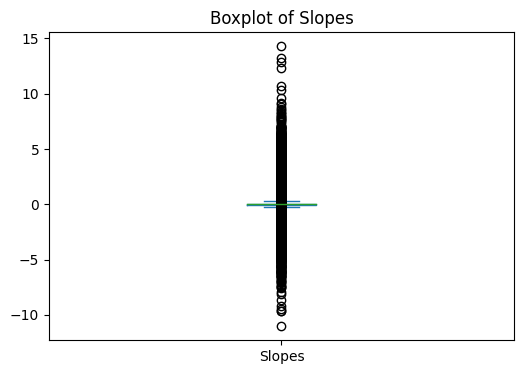

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(a)
# Select the column you want to analyze
selected_column = 'Slopes'

# Calculate z-scores for the selected column
z_scores = np.abs((df[selected_column] - df[selected_column].mean()) / df[selected_column].std())

# Set a threshold for outlier detection (e.g., z-score greater than 3)
outlier_threshold = 3

# Detect outliers
outliers = df[z_scores > outlier_threshold]

# Visualize outliers using a box plot
plt.figure(figsize=(6, 4))
df[selected_column].plot.box()
plt.title(f"Boxplot of {selected_column}")
plt.show()


In [ ]:
a = pd.DataFrame(df)
# Filter rows where 'TimeDiff' is less than 7
filtered_rows = df[df['TimeDiff'] < 7]

# Get the indices of the filtered rows
indices = filtered_rows.index

# Include the row before each filtered row
indices_to_include = indices.union(indices - 1).union(indices + 1)
all_indices = indices.union(indices_to_include)

# Select the rows based on the indices
result = df.loc[all_indices]
result

,PatientUID,PatientVisitUID,ResultValue,CWhen,datetime,TimeDiff,Slopes


In [ ]:
result

,PatientUID,PatientVisitUID,ResultValue,CWhen,datetime,TimeDiff,Slopes


In [ ]:
a

,PatientUID,PatientVisitUID,ResultValue,CWhen,datetime,TimeDiff,Slopes
0,2299,3640924,66.80,2559-11-11 09:40:06.053,2016-11-11 09:40:06.053,87.0,NaN
1,2299,4020970,67.20,2560-03-31 10:18:54.363,2017-03-31 10:18:54.363,140.0,0.002857
2,2299,4286612,69.20,2560-07-05 10:40:40.763,2017-07-05 10:40:40.763,96.0,0.020833
3,2299,4546471,63.60,2560-10-03 09:19:54.710,2017-10-03 09:19:54.710,89.0,-0.062921
4,2299,4801938,58.40,2561-01-04 09:03:28.847,2018-01-04 09:03:28.847,92.0,-0.056522
...,...,...,...,...,...,...,...
280078,3409733,10435209,49.13,2566-03-02 09:24:57.310,2023-03-02 09:24:57.310,83.0,-0.208313
280079,3432056,10235244,48.51,2566-01-09 12:31:53.220,2023-01-09 12:31:53.220,25.0,0.168400
280080,3432056,10306813,67.71,2566-01-27 12:22:43.000,2023-01-27 12:22:43.000,17.0,1.129412
280081,3432056,10408954,68.69,2566-02-24 21:05:12.747,2023-02-24 21:05:12.747,28.0,0.035000


In [ ]:
a.to_excel('LabSlope.xlsx', index=False)